# Generating deterministic model with different revenue rates


### Running Deterministic Optimization

In [1]:
import numpy as np
state_space = np.linspace(5,7,50)
fr_universe = list(np.exp(state_space)/1000)


In [2]:
#fr_universe = list(np.linspace(np.exp(5)/1000,np.exp(7)/1000,50))
#state_space = np.array(np.log(fr_universe*1000))

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from Logistics_stoch import CShip
from Logistics_stoch import CRoundtrip
from Logistics_stoch import CJourney
from Logistics_stoch import CPort
import deterministic_opt_func as det_opt

oJourney = CJourney(NrOfRoundtrips = 1,
                    LegsPerRoundtrip = 5,
                    OpprtCostCapitalRate = 0.08,
                    DailyHire_USDperDay = 30000,
                    FutureProfitPotential_USDperDay = 0) #12968


oShip = CShip(Vmin=10, 
              Vmax=17, 
              DWTscantling=157880, 
              DWTdesign=145900, 
              Lightweight=49000, 
              k=0.00000391, 
              p=381, 
              g=3.1, 
              a=0.666667, 
              ShipDischargeRate=3000, 
              BallastCapacity=54500,
              MinFillRateShip=0.3,
              AuxFuelConsumption_TonnePerDay=5)

results = {}
for fr in fr_universe:
    print("Running for Freight Rate of: " + str(fr))
    
    oPortList = []

    df_data = pd.read_excel('journey_data.xlsx',sheet_name='Ports')

    for i in range(0,oJourney.LegsPerRoundtrip+1):
        for index,row in df_data.iterrows():
            v_name = row['Variable']
            v_value = row[i]
            #print("Loading from excel, leg:"+str(i)+", Executing statement("+str(v_name)+"="+str(v_value)+")")
            exec(v_name + '=' + str(v_value))


        oPort = CPort(PortNr=i, 
                      DistancePreviousPort_nm=DistancePreviousPort_nm,
                      LoadingRate_QbmetresperHr=LoadingRate_QbmetresperHr,
                      WaitingTime_Hrs=WaitingTime_Hrs,              
                      CargoIntake_Barrels=CargoIntake_Barrels,
                      CargoIntake_QBmetresperBarrel=CargoIntake_QBmetresperBarrel,
                      CargoIntake_QbmetresPerTonne=CargoIntake_QbmetresPerTonne,
                      FixedPortAccessCosts_USD = FixedPortAccessCosts_USD,
                      UnloadingCharge_USDperHr = UnloadingCharge_USDperHr,
                      LoadingCharge_USDperHr = LoadingCharge_USDperHr,
                      CargoRevenueRate_USDperBarrelper1000nm = fr, # CargoRevenueRate_USDperBarrelper1000nm,
                      MainBunkerRate_USDperBarrel = MainBunkerRate_USDperBarrel,
                      MainBunker_QBmetresperBarrel = MainBunker_QBmetresperBarrel,
                      MainBunker_QbmetresPerTonne = MainBunker_QbmetresPerTonne,
                      AuxFuelRate_USDperTonne = AuxFuelRate_USDperTonne,
                      UnloadingCosts_USD = UnloadingCosts_USD,
                      LoadingCosts_USD = LoadingCosts_USD,
                      CargoIntake_Tonne = CargoIntake_Tonne,
                      UnloadingTime_Hrs = UnloadingTime_Hrs,
                      LoadingTime_Hrs = LoadingTime_Hrs,
                      LegRevenue_Barrels = LegRevenue_Barrels,
                      LegRevenue_USD = LegRevenue_USD)

        oPortList.append(oPort)

    oRTList_det = det_opt.run_deterministic_opt(oJ=oJourney,
                                                oS=oShip,
                                                oPL=oPortList)
    results[fr] = oRTList_det
# storing solution in the journey object
oJourney.oRTList_det = oRTList_det


Running for Freight Rate of: 0.1484131591025766
********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:0.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:624115.0140739438
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:-807689.1523704914
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:620865.7099812457
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:-1609401.0344462034
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!

LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:618848.1048106459
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:1
FutureGoodwill:-2166563.6250704313
1-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:617241.2853485089
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:-2748405.528013033
Delta T = 33.98077356675092
Delta T = 33.952984140433514
Delta T = 33.918247357536764
Delta T = 33.88351057464001
Delta T = 33.848773791743255
RoundtripTime_Days:169.58428943110448
   Leg Nr  Days at Sea  Speed(knots)  Roundtrip Time Days
0     0.0    28.447440     12.146670           169.584289
1     1.0    28.419651     12.158547           169.584289
2     2.0    28.384914     12.173427           169.584289
3     3.0    28.350177     12.188342           169.584289
4     4.0    28.315440     12.203295           169.584289
Running for Freight Rate of: 

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:0.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:626569.1990318163
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:-68730.97796993575
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:626569.1990318163
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:-136954.3493974574
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!


********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:0.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:628625.7091969505
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:430479.44106562866
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:629864.5997094855
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:857783.7846418384
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
L

LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:634439.4369657054
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:2077751.3947441578
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:638220.5324153289
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:2
FutureGoodwill:3105180.215684679
2-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:641610.5924431223
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:1
FutureGoodwill:4125070.811988594
1-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:645457.4920480255
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:5076406.145186342
Delta T = 33.50835

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:0.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:634021.437823212
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:1963016.2069139688
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:641185.3277537265
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:3911612.57504547
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
Loa

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:0.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:638220.5324153289
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:3138709.1249097334
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:649339.8059743166
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:6254433.026679711
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
L

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:0.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:642462.4191436756
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:4364122.995067297
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:658096.0189426014
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:8696388.096246593
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
Lo

********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barrels=1200000.0
i=5
oPList[i].CargoIntake_Barrels=1200000.0
RoundtripNr:1
LegNr:5
FutureGoodwill:0.0
5-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:649339.8059743166
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:4
FutureGoodwill:6206161.2147457395
4-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!
LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:671572.0432035604
UnloadingCosts_USD:217600.0
RoundtripNr:1
LegNr:3
FutureGoodwill:12367229.804278774
3-!-!-!-!----Leg-------------------------!!!!!!
1-!-!-!-!----RoundTrip-------------------------!!!!!!


LoadingCost_OtherOperations_USD:517600.0
LoadingCost_MainBunker_USD:771421.9227444829
UnloadingCosts_USD:217600.0
oRT(RoundtripNr).RoundtripGoodwill=:39935917.08435412
Delta T = 31.72983003504136
Delta T = 32.091092577167586
Delta T = 32.48014454561121
Delta T = 32.890038583792894
Delta T = 33.33466940487132
RoundtripTime_Days:162.52577514648436
   Leg Nr  Days at Sea  Speed(knots)  Roundtrip Time Days
0     0.0    26.196497     13.190377           162.525775
1     1.0    26.557759     13.010950           162.525775
2     2.0    26.946811     12.823100           162.525775
3     3.0    27.356705     12.630968           162.525775
4     4.0    27.801336     12.428959           162.525775
Running for Freight Rate of: 1.0966331584284585
********* Running CalculateCargoImplicationsData
i=0
oPList[i].CargoIntake_Barrels=1200000.0
i=1
oPList[i].CargoIntake_Barrels=1200000.0
i=2
oPList[i].CargoIntake_Barrels=1200000.0
i=3
oPList[i].CargoIntake_Barrels=1200000.0
i=4
oPList[i].CargoIntake_Barre

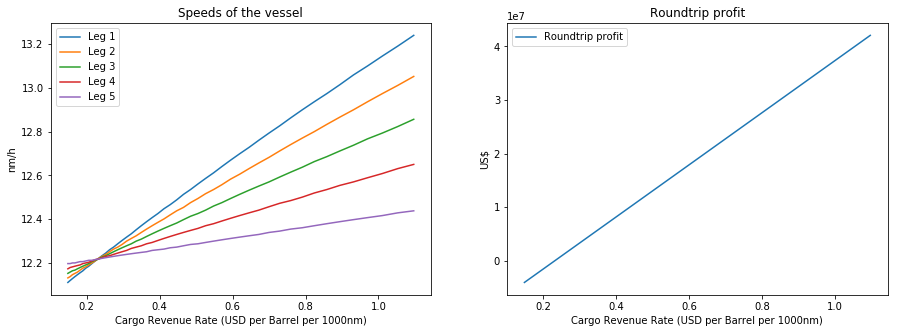

In [37]:
s = np.zeros(shape=(50,5))
#for fr in fr_universe:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
determ_legs = {}
for leg_nr in range(0,oJourney.LegsPerRoundtrip):
    y = [results[fr][1].oLegList[leg_nr].Speed_kn for fr in fr_universe]
    #y = [results[fr][1].RoundtripGoodwill for fr in fr_universe]
    x = [state_space[fr_universe.index(fr)] for fr in fr_universe]
    x = [fr for fr in fr_universe]
    determ_legs[leg_nr] = (x,y)
    plt.plot(x, y, label='Leg ' + str(leg_nr+1))
    #s[fr_universe.index(fr),leg_nr] = results[fr][1].oLegList[leg_nr].Speed_kn

rt_y = [results[fr][1].RoundtripGoodwill for fr in fr_universe]
rt_x = [fr for fr in fr_universe]


#plt.plot(state_space,s)
plt.xlabel('Cargo Revenue Rate (USD per Barrel per 1000nm)') 
plt.ylabel('nm/h') 
plt.title('Speeds of the vessel')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(rt_x,rt_y,label='Roundtrip profit')
plt.xlabel('Cargo Revenue Rate (USD per Barrel per 1000nm)') 
plt.ylabel('US$') 
plt.title('Roundtrip profit')
plt.legend()

plt.show()


## Running the stochastic optimization

In [49]:
ou_process = OU_process.OU_process(r_bar = 6.2, 
                                   r_lambda=0.0, 
                                   r_sigma=0.2#, 
                                   #r_start=np.log(np.min(rt_x)*1000),
                                   #r_end=np.log(np.max(rt_x)*1000)                                  
                                  )

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


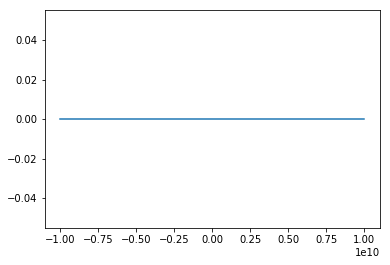

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1f10a6f908>
Running optimization for state: 5.400022384723112
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.427140269986735
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.454258155250359
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.4813760405139815
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.508493925777605
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.535611811041228
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.562729696304852
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.589847581568475
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.616965466832099
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


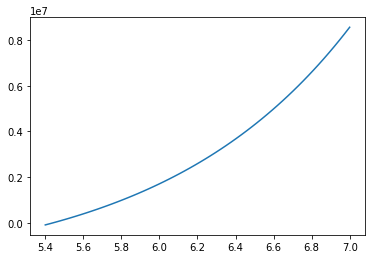

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1f109de278>
Running optimization for state: 5.400022384723112
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.427140269986735
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.454258155250359
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.4813760405139815
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.508493925777605
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.535611811041228
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.562729696304852
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.589847581568475
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.616965466832099
0
0
0
0
0
0
0
0
0
0
0
0
0


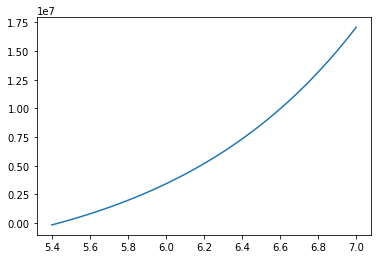

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1f10bd59a8>
Running optimization for state: 5.400022384723112
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.427140269986735
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.454258155250359
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.4813760405139815
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.508493925777605
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.535611811041228
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.562729696304852
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.589847581568475
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.616965466832099
0


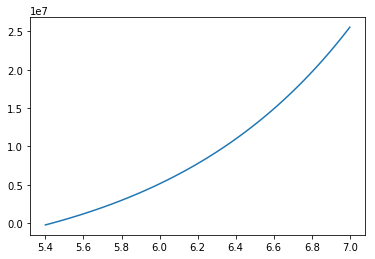

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1f1016a778>
Running optimization for state: 5.400022384723112
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.427140269986735
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.454258155250359
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.4813760405139815
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.508493925777605
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.535611811041228
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.562729696304852
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.589847581568475
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.616965466832099
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state

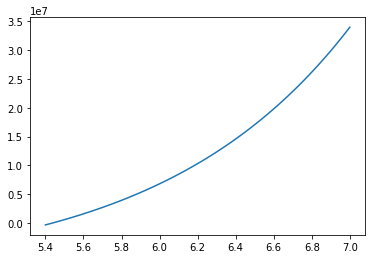

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1f1016c8b8>
Running optimization for state: 5.400022384723112
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.427140269986735
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.454258155250359
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.4813760405139815
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.508493925777605
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.535611811041228
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.562729696304852
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for state: 5.589847581568475
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
Running optimization for sta

In [50]:
from Optimization_Problem import Optimization_Problem
op0 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=ou_process, 
                          ffa=FFA.FFA(fut_curve_slope = -0.01), 
                          eta=0) # determines how important is the variance of future spot rates)
oRTList0 = op0.run_optimization()

# Display the results



## Value Function ($G$) or Goodwill 

The final value function after all legs and rountrip were calculated from the back.

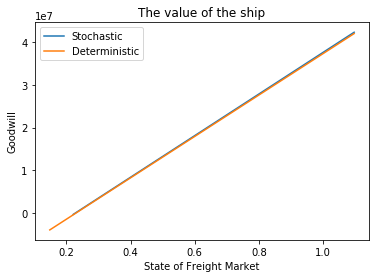

In [51]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 
x = np.exp(oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.x)/1000
plt.plot(x,
         oRTList0[oJourney.NrOfRoundtrips].RoundtripGoodwill.y,
        label='Stochastic')
plt.plot(rt_x,
         rt_y,
         label='Deterministic')

plt.xlabel('State of Freight Market') 
plt.ylabel('Goodwill') 
plt.title('The value of the ship')
plt.legend()
plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.show()



## Speed trip

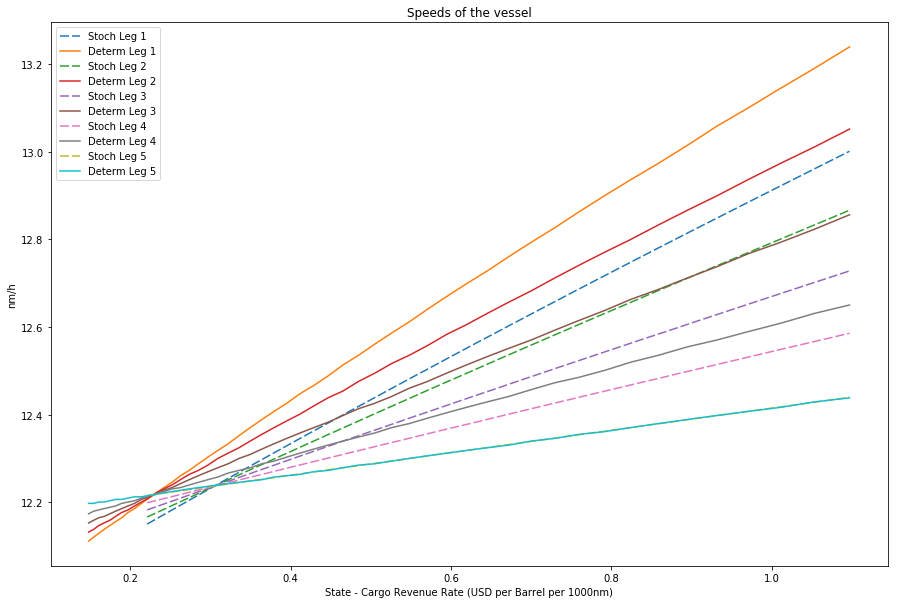

In [52]:
plt.subplots(figsize=(15, 10))
x = np.exp(oRTList0[1].oLegList[0].Speed_kn.x)/1000
for leg_i in range(0,oJourney.LegsPerRoundtrip):
    plt.plot(x,
             oRTList0[1].oLegList[leg_i].Speed_kn.y, 
             label='Stoch Leg ' + str(leg_i+1),
             dashes=[6, 2])
    (x1,y1) = determ_legs[leg_i]
    plt.plot(x1,
             y1, 
             label='Determ Leg ' + str(leg_i+1))
    
plt.xlabel('State - Cargo Revenue Rate (USD per Barrel per 1000nm)') 
plt.ylabel('nm/h') 
plt.title('Speeds of the vessel')
plt.legend()
plt.show()


## Hedge Ratio

IndexError: list index out of range

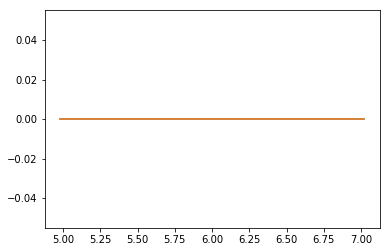

In [11]:
plt.plot(oRTList0[1].oLegList[0].Hedge_Ratio.x,
         oRTList0[1].oLegList[0].Hedge_Ratio.y, 
         label='Leg 5')
plt.plot(oRTList0[1].oLegList[1].Hedge_Ratio.x,
         oRTList0[1].oLegList[1].Hedge_Ratio.y, 
         label='Leg 4')
plt.plot(oRTList0[1].oLegList[2].Hedge_Ratio.x,
         oRTList0[1].oLegList[2].Hedge_Ratio.y, 
         label='Leg 3')
plt.plot(oRTList0[1].oLegList[3].Hedge_Ratio.x,
         oRTList0[1].oLegList[3].Hedge_Ratio.y, 
         label='Leg 2')
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y, 
         label='Leg 1')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Optimal hedge ratio for each state')
plt.show()

## Changing parameters of the problem:

Assume that the forward rates are discounted by more than previously assumed, in this case hadging is more costly on average, we expect less hedging and decrease of the hedge ratio:

> ffa = FFA.FFA(fut_curve_slope = -0.01)

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


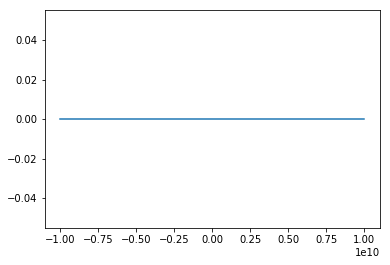

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1c5fc1d368>
Running optimization for state: 5.600016788542334
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.620355202490051
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.640693616437769
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.661032030385487
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.681370444333203
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.515245416189622
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.535583830137339
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.555922244085057
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5762606580327745
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.596599071980491
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

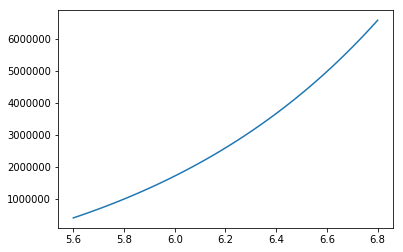

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1c5fcc5098>
Running optimization for state: 5.600016788542334
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.620355202490051
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.640693616437769
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.661032030385487
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.454230174346469
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.474568588294186
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.494907002241904
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.515245416189622
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.535583830137339
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06


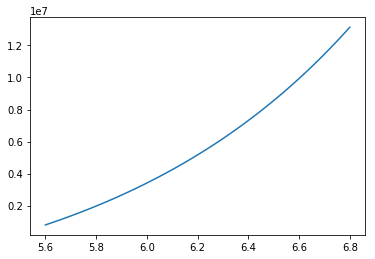

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1c5da28958>
Running optimization for state: 5.600016788542334
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.620355202490051
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.640693616437769
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.661032030385487
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.535583830137339
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.555922244085057
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5762606580327745
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.596599071980491
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.616937485928209
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

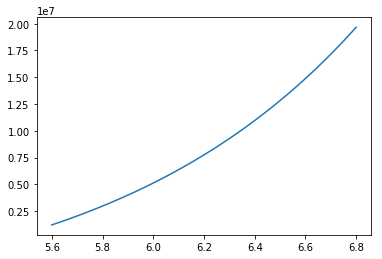

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1c5faf0b88>
Running optimization for state: 5.600016788542334
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.620355202490051
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.640693616437769
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.661032030385487
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.681370444333203
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.555922244085057
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.5762606580327745
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.596599071980491
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.616937485928209
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.6372758998759265
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-0

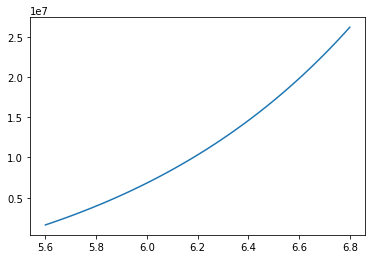

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7f1c5d8dbe58>
Running optimization for state: 5.600016788542334
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.620355202490051
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.640693616437769
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.661032030385487
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.681370444333203
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running o

1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.657614313823644
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.677952727771362
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.6982911417190785
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.718629555666796
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 6.738967969614514
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06

In [34]:
from Optimization_Problem import Optimization_Problem
op1 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, 
                                                        r_lambda=0, 
                                                        r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.000001) 
oRTList1 = op1.run_optimization()

## Comparison of hedge ratios

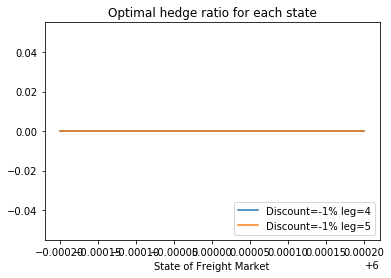

In [35]:
plt.plot(oRTList0[1].oLegList[0].Hedge_Ratio.x,
         oRTList0[1].oLegList[0].Hedge_Ratio.y, 
         label='Discount=-1% leg=4')
plt.plot(oRTList0[1].oLegList[4].Hedge_Ratio.x,
         oRTList0[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% leg=5')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

## Comparison of time of journeys of the last leg

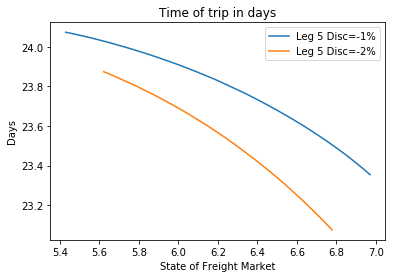

In [13]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1%')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2%')
plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## More importance to the volatility of the spot rates 
>eta=0.000001

********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


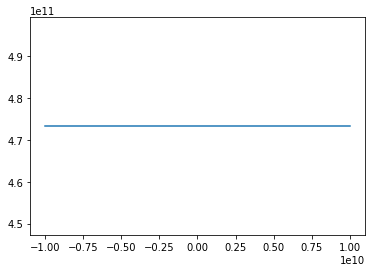

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7816311d8>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.713129168707649
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.733001447535909
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state

1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.607381715979314
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.627253994807573
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.647126273635832
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.666998552464092
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 6.686870831292351
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-0

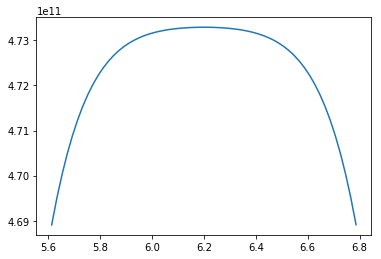

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd781477b88>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.713129168707649
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimiza

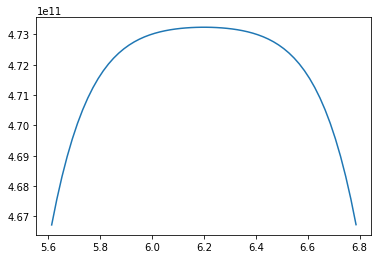

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd783896b88>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Ru

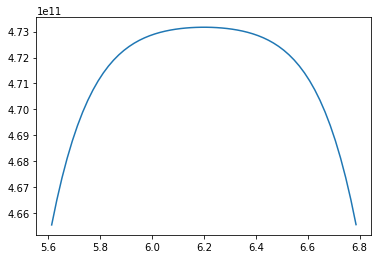

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd781593048>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.713129168707649
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06


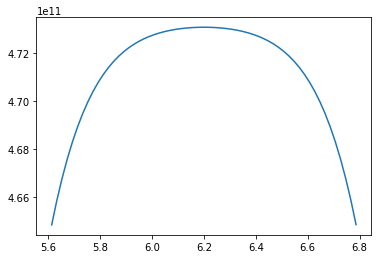

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd78148de58>
Running optimization for state: 5.6137677745663535
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.633640053394613
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6535123322228715
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.673384611051131
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Running optimization for state: 5.6932568898793905
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
1.5e-06
Ru

1.5e-06
1.5e-06
1.5e-06
0


In [116]:
op2 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.02), 
                          eta=0.0000015) 
oRTList2 = op2.run_optimization()

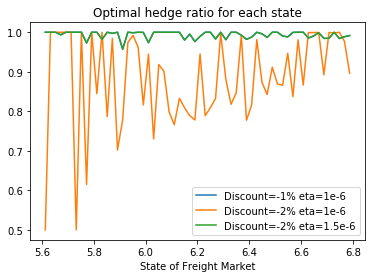

In [117]:
plt.plot(oRTList1[1].oLegList[4].Hedge_Ratio.x,
         oRTList1[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=1e-6')
plt.plot(oRTList2[1].oLegList[4].Hedge_Ratio.x,
         oRTList2[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1e-6')
plt.plot(oRTList1[1].oLegList[4].Hedge_Ratio.x,
         oRTList1[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='lower right')
plt.show()

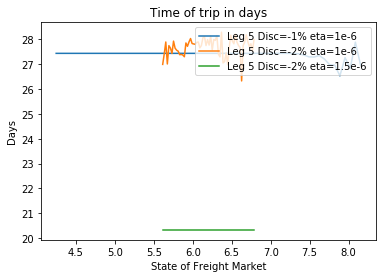

In [118]:
plt.plot(oRTList0[1].oLegList[0].TimeAtSea_Days.x,
         oRTList0[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-1% eta=1e-6')
plt.plot(oRTList1[1].oLegList[0].TimeAtSea_Days.x,
         oRTList1[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1e-6')
plt.plot(oRTList2[1].oLegList[0].TimeAtSea_Days.x,
         oRTList2[1].oLegList[0].TimeAtSea_Days.y, 
         label='Leg 5 Disc=-2% eta=1.5e-6')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='upper right')
plt.title('Time of trip in days')
plt.show()

## Changing paramters of the OU process

> ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=3, r_sigma=0.3)


********* Running CalculateCargoImplicationsData
RoundtripNr:1
LegNr:5


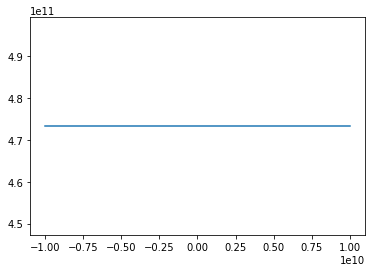

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7812789a8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

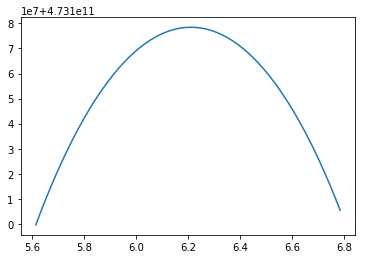

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7812bbf48>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

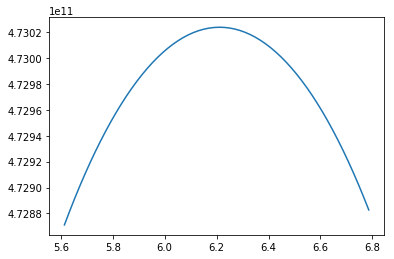

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7815e37c8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

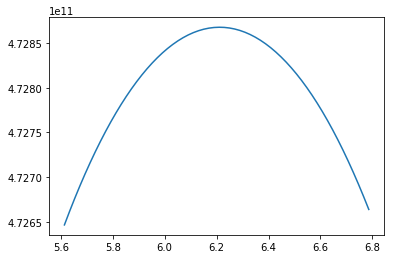

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7816edf98>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

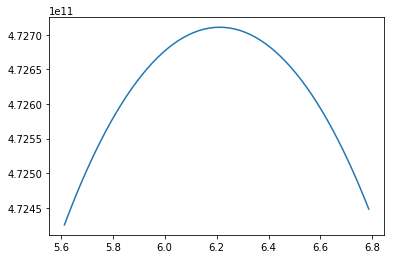

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd783904728>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

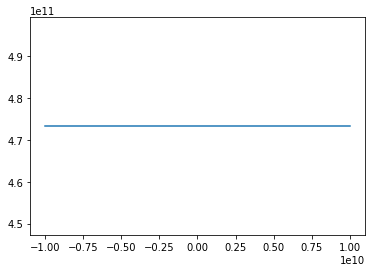

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd783896958>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

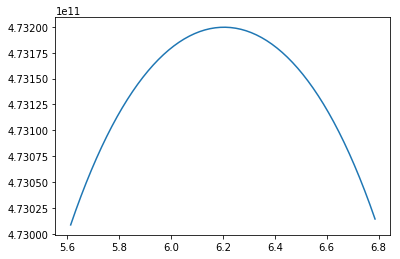

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7814b3cc8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

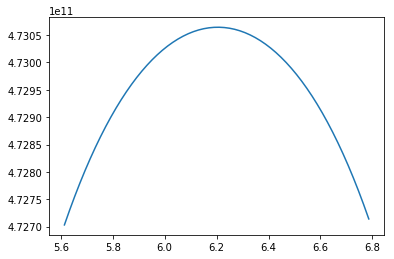

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7838ebc78>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

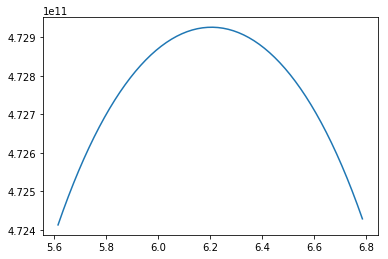

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd781431ef8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1

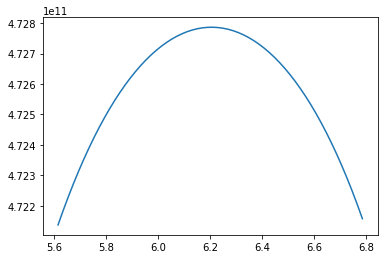

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7814079f8>
Running optimization for state: 5.6137677745663535
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.633640053394613
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6535123322228715
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.673384611051131
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.6932568898793905
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.713129168707649
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.733001447535909
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.752873726364168
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.7727460051924275
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
Running optimization for state: 5.792618284020686
1e-06
1e-06
1e-06
1

In [119]:
op3 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.5, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.05), 
                          eta=0.000001) 
oRTList3 = op3.run_optimization()

op4 = Optimization_Problem(oJourney=oJourney, 
                          oShip=oShip, 
                          oPortList=oPortList, 
                          process=OU_process.OU_process(r_bar = 6.2, r_lambda=0.8, r_sigma=0.3), 
                          ffa=FFA.FFA(fut_curve_slope = -0.05), 
                          eta=0.000001) 
oRTList4 = op4.run_optimization()

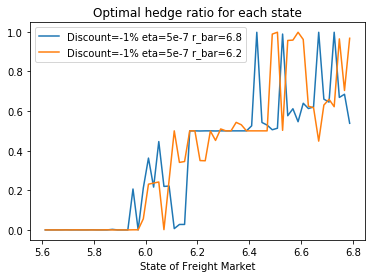

In [120]:
plt.plot(oRTList3[1].oLegList[4].Hedge_Ratio.x,
         oRTList3[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.8')
plt.plot(oRTList4[1].oLegList[4].Hedge_Ratio.x,
         oRTList4[1].oLegList[4].Hedge_Ratio.y, 
         label='Discount=-1% eta=5e-7 r_bar=6.2')


plt.xlabel('State of Freight Market') 
#plt.ylabel('Optimal Hedge Ratio') 
plt.title('Optimal hedge ratio for each state')
plt.legend(loc='upper left')
plt.show()

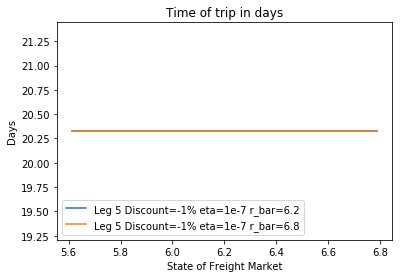

In [121]:
plt.plot(oRTList3[1].oLegList[4].TimeAtSea_Days.x,
         oRTList3[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.2')
plt.plot(oRTList4[1].oLegList[4].TimeAtSea_Days.x,
         oRTList4[1].oLegList[4].TimeAtSea_Days.y, 
         label='Leg 5 Discount=-1% eta=1e-7 r_bar=6.8')

plt.xlabel('State of Freight Market') 
plt.ylabel('Days') 
plt.legend(loc='lower left')
plt.title('Time of trip in days')
plt.show()

## Checking if the function is convex

In [122]:
ou_process = OU_process.OU_process(r_bar = 6.2, r_lambda=1.8, r_sigma=0.3)
ffa = FFA.FFA(fut_curve_slope = -0.5)

params = [ou_process.r_bar ,oShip, oPortList, oJourney, ou_process, ffa, 0.00002]

In [123]:
leg = oRTList0[1].oLegList[0]
t_range = np.linspace(leg.TimeAtSeaMin_Days,leg.TimeAtSeaMax_Days,num=100)
h_range = np.linspace(0,1,num=100)
z = np.zeros((100,100))
it = 0
ih = 0
max_z = 0
for t in t_range:
    ih = 0
    for h in h_range:
        z[it,ih],q = leg.CalcGoodwill([h,t],params)
        if z[it,ih]>max_z:
            h_max = h
            t_max = t
            max_z = z[it,ih] 
        ih = ih + 1
    it = it + 1
    

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-0

2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05
2e-05


In [124]:
print([h_max,t_max,max_z])

[0.686868686868687, 20.32598039215686, 85610406947.11758]


In [126]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv
x, y = t_range, h_range
fig = go.Figure(data=[go.Surface(z=z.T, x=x, y=y)])
fig.update_layout(title='Goodwill as a function of time and hedge ratio', autosize=False,
                  width=1000, height=1000,
                  scene = dict(
                    xaxis_title='Time of the leg in days',
                    yaxis_title='Hedge ratio from 0 to 1',
                    zaxis_title='Value of the ship'),
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

RoundtripNr:1
LegNr:1


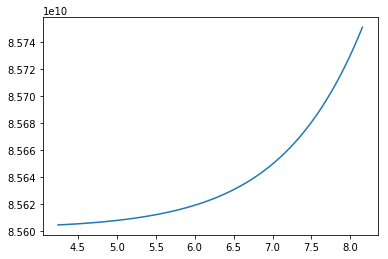

FutureGoodwill:<scipy.interpolate.interpolate.interp1d object at 0x7fd7817742c8>
Running optimization for state: 5.6137677745663535
0
0
0
0
0
0
0
Running optimization for state: 5.633640053394613
0
0
0
0
0
0
0
Running optimization for state: 5.6535123322228715
0
0
0
0
0
0
0
Running optimization for state: 5.673384611051131
0
0
0
0
0
0
0
Running optimization for state: 5.6932568898793905
0
0
0
0
0
0
0
Running optimization for state: 5.713129168707649
0
0
0
0
0
0
0
Running optimization for state: 5.733001447535909
0
0
0
0
0
0
0
Running optimization for state: 5.752873726364168
0
0
0
0
0
0
0
Running optimization for state: 5.7727460051924275
0
0
0
0
0
0
0
Running optimization for state: 5.792618284020686
0
0
0
0
0
0
0
Running optimization for state: 5.812490562848946
0
0
0
0
0
0
0
Running optimization for state: 5.832362841677205
0
0
0
0
0
0
0
Running optimization for state: 5.852235120505464
0
0
0
0
0
0
0
Running optimization for state: 5.872107399333723
0
0
0
0
0
0
0
Running optimizatio

In [127]:
leg.FindBestGoodwill(ou_process, ffa, 0, oJourney, oShip, oRTList0, oPortList)

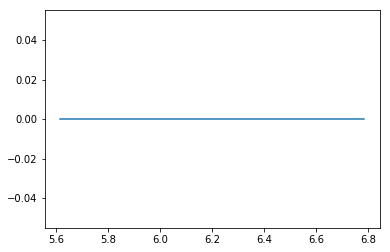

In [128]:
plt.plot(leg.Hedge_Ratio.x,leg.Hedge_Ratio.y)